<center> <h1> $\text{EEE428 HW3}$ </h1></center>

### $\text{Kazım Sanlav}$

## Q1

In [1]:

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt


### Part(a)

In [2]:

data = sio.loadmat('/home/kazim/Desktop/courses/EE428/PS3/perceptrontest.mat')['D']
X = data[:,:-1]
Y = data[:,-1]


In [40]:

class perceptron():
  
    def __init__(self,num_W):
        self.W = np.zeros(num_W) #weights
        self.hist=[]
    
    def getW(self):
        '''
        Returns: np-array weights of the perceptron
        '''
        return self.W
    
    def setW(self,w):
        '''
        Sets the weights of the perceptron
        '''
        self.W = w
        
    def train(self,X,Y,l_rate=10**-3,max_iter=10**3,treshold=0.01,SGD=False,trace=False):
        '''
        X: np-array (n,11)
        Y: np-array (n,)
        
        Train the perceptron until convergence
        '''
        # converged = False
        # W_last = 0
        if not SGD: #if Batch gradient update      
            iteration = 0
            while  iteration < max_iter:
                iteration+=1
                if(trace and iteration%50==0):
                    print('iteration:',iteration,' # of mistakes:',self.evaluate(X,Y))
                self.hist.append(self.evaluate(X,Y))            
                Y_hat = self.predict(X) #prediction
                self.W += l_rate*(X.T@(Y-Y_hat)) #update W
                # if((W_last-self.W).T@(W_last-self.W) < treshold):
                #     converged = True
                #     break
                # W_last = self.W
       
        else: #if SGD update
            iteration = 0
            while  iteration < max_iter:
                iteration+=1
                if(trace and iteration%200==0):
                    print('iteration:',iteration,' # of mistakes:',self.evaluate(X,Y))
                self.hist.append(self.evaluate(X,Y))
                for i in range(X.shape[0]):
                    x,y = X[i,:], Y[i]
                    y_hat = 1 if self.W@x.T >= 0 else 0 #prediction
                    self.W += l_rate*(x*(y-y_hat)) #update W
                # if((W_last-self.W).T@(W_last-self.W) < treshold):
                #     converged = True
                #     break
                # W_last = self.W
    
    def predict(self,X):
        '''
        X: np-array (n,11)
        Returns: np-array Y predicted (n,) 
        '''
        Y_hat = X@(self.W)
        Y_hat[Y_hat>=0] = 1
        Y_hat[Y_hat<0] = 0
        return Y_hat
    
    def evaluate(self,X,Y):
        '''
        X: np-array (n,11)
        Y: np-array (n,)
        Returns: total number of mistakes
        '''
        Y_hat = self.predict(X)
        return np.sum(np.abs(Y_hat - Y))
    
    def plot_mistakes(self):
        '''
        Plot the training of the perceptron 
        '''
        plt.plot(self.hist)
        plt.title('History of Error')
        plt.xlabel('Iteration')
        plt.ylabel('# of Misclassifaction')
        plt.show()


### Part(b)

In [45]:
percepton_ = perceptron(num_W=11)
percepton_.getW()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
percepton_.train(X,Y,max_iter=5000,l_rate=1,SGD=True,trace=True)
percepton_.getW()

iteration: 200  # of mistakes: 137.0
iteration: 400  # of mistakes: 113.0
iteration: 600  # of mistakes: 20.0
iteration: 800  # of mistakes: 36.0
iteration: 1000  # of mistakes: 23.0
iteration: 1200  # of mistakes: 5.0
iteration: 1400  # of mistakes: 11.0
iteration: 1600  # of mistakes: 9.0
iteration: 1800  # of mistakes: 13.0
iteration: 2000  # of mistakes: 18.0
iteration: 2200  # of mistakes: 14.0
iteration: 2400  # of mistakes: 8.0
iteration: 2600  # of mistakes: 14.0
iteration: 2800  # of mistakes: 30.0
iteration: 3000  # of mistakes: 7.0
iteration: 3200  # of mistakes: 10.0
iteration: 3400  # of mistakes: 13.0
iteration: 3600  # of mistakes: 0.0
iteration: 3800  # of mistakes: 0.0
iteration: 4000  # of mistakes: 0.0
iteration: 4200  # of mistakes: 0.0
iteration: 4400  # of mistakes: 0.0
iteration: 4600  # of mistakes: 0.0
iteration: 4800  # of mistakes: 0.0
iteration: 5000  # of mistakes: 0.0


array([  67.        ,   33.76134911,  271.936284  , -237.26890111,
       -135.75369983, -203.70461858,  -67.36711394,  271.83957921,
        102.18422332, -135.85410976, -102.00287411])

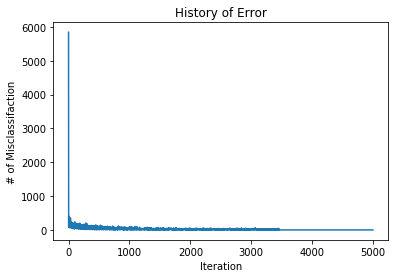

In [47]:
percepton_.plot_mistakes()

### Part(c)

---

Dataset is linearly seperable and the seperating hyperplane is $w.x=0$ where w is learned weights by the perceptron, which is: $w = \array{[67.0, 33.76, 271.93, -237.26, -135.75, -203.70, -67.36, 271.84, 102.18, -135.85, -102.0]}^T \text{and }x \in R^{11} $

---

There are other seperating hyperplanes also,i.e. $\hat{w}.x=0$ such that:  
$\hat{w} = \array{[67.0, 33.77, 271.93, -237.26, -135.75, -203.70, -67.36, 271.84, 102.18, -135.85, -102.0]}^T \text{and }x \in R^{11} $

Observe that $\hat{w}_1$ = $w_1 + 0.01$ so, $\hat{w} \neq w$

In [37]:
percepton_2 = perceptron(num_W=11)
percepton_2.setW(np.array([67.0,33.77,271.93,-237.26,-135.75,-203.70,-67.36,271.84,102.18,-135.85,-102.0]))

In [38]:
percepton_2.train(X,Y,max_iter=1,l_rate=1,SGD=True,trace=True)

iteration: 1  # of mistakes: 0.0


In [39]:
percepton_2.getW()

array([  67.  ,   33.77,  271.93, -237.26, -135.75, -203.7 ,  -67.36,
        271.84,  102.18, -135.85, -102.  ])

We see that by changing the slope of the original seperating hyperplane a little, we get another one that still seperates the data without any mistake.

---

### Part(d)

The optimal separating hyperplane separates the two classes and maximizes the distance to the closest point from either class. By doing so;  
* It provides a unique solution to the separating hyperplane problem;
* It maximizes the margin between the two classes on the training data.  

It our case, amoung giving 10 classifiers, I would choose the one with has the maximum distance ($l_2$) between closest point from both class.

## Q3

In [1]:

import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


### Part(a)

/home/kazim/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


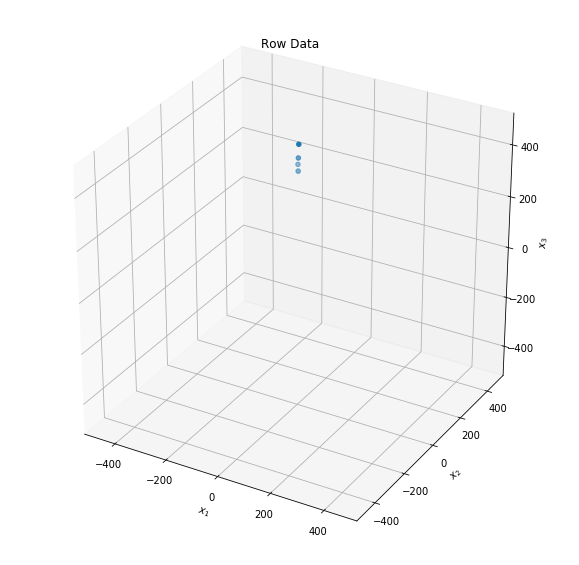

In [2]:

data = np.array([[1,4,400],[3,5,500],[3,2,450],[3,1,400],[1,3,425]])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0],data[:,1],data[:,2])
ax.set_xlim(-500,500)
ax.set_ylim(-500,500)
ax.set_zlim(-500,500)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.set_title('Row Data')
fig.show()

##################################
#          Part (a)
##################################


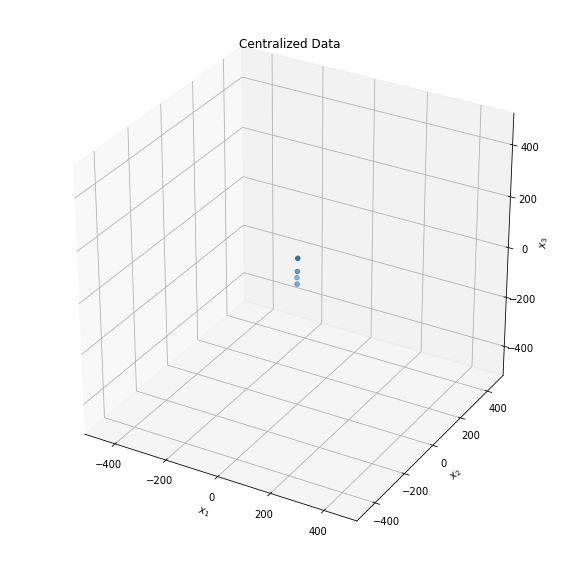

In [3]:

data_cen = data-np.mean(data,axis=0) #centralize data

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_cen[:,0],data_cen[:,1],data_cen[:,2])
ax.set_xlim(-500,500)
ax.set_ylim(-500,500)
ax.set_zlim(-500,500)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.set_title('Centralized Data')
fig.show()


In [4]:

class PCA(object):
    def __init__(self,num_of_com):
        self.num_of_com = num_of_com
        self.cov = None
        self.eigenvalues = None
        self.eigenvectors = None
        self.data = None
    def fit(self,data):
        self.data = data
        self.cov = (1/(data.shape[0]))*(data.T@data)
        self.eigenvalues, self.eigenvectors =  LA.eig(self.cov)
        sorting_index = np.argsort(-self.eigenvalues).copy() ## sort by eigenvalues
        self.eigenvalues = self.eigenvalues[sorting_index] 
        self.eigenvectors = self.eigenvectors[:,sorting_index]
    def get_covariance(self):
        return self.cov
    def get_eigenvalues(self):
        return self.eigenvalues
    def get_eigenvectors(self):
        return self.eigenvectors
    def get_transform(self):
        basis = self.eigenvectors[:,:self.num_of_com]
        return self.data@basis
    def get_explained_variance_ratio(self):
        ratios = []
        data = self.data.copy()
        total_var = np.sum(data**2)/data.shape[0]
        for i in range(self.num_of_com): #for each Principal component
            pve_i = 0 #percent of variance explained by ith Principal component
            pc_i = self.get_eigenvectors()[:,i]
            for j in range(data.shape[0]): #for each data instance
                pve_i += np.sum(data[j,:] @ pc_i)**2
            ratios.append(pve_i/data.shape[0])
                
        return [ratio / total_var for ratio in ratios]
    

In [5]:
        
pca = PCA(2)
pca.fit(data_cen) 
pca_data = pca.get_transform()


In [6]:

print('Covariance Matrix\n',pca.get_covariance(),'\n')
print('eigenvalues\n',pca.get_eigenvalues(),'\n')
print('eigenvectors\n',pca.get_eigenvectors(),'\n')


Covariance Matrix
 [[ 9.6e-01 -4.0e-01  1.8e+01]
 [-4.0e-01  2.0e+00  3.0e+01]
 [ 1.8e+01  3.0e+01  1.4e+03]] 

eigenvalues
 [1.40087460e+03 1.88888748e+00 1.96516037e-01] 

eigenvectors
 [[-0.01284779 -0.56081846  0.82783911]
 [-0.02143544  0.82787166  0.56050784]
 [-0.99968768 -0.01054381 -0.02265771]] 



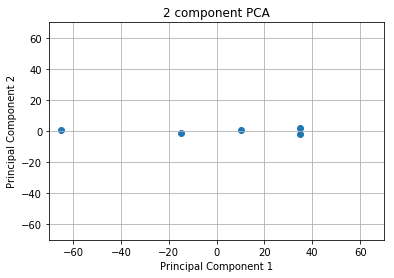

Explained Variance Ration: [0.9985135688031367, 0.001346358752354198]


In [7]:

plt.scatter(pca_data[:,0],pca_data[:,1],alpha=1)
plt.xlim(-70,70)
plt.ylim(-70,70)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
plt.grid()
plt.show()
print('Explained Variance Ration:',pca.get_explained_variance_ratio())



---

Because one of the features has a very high scale compared to other two and varience along this feature is much larger, as a consequence it has much larger eigenvalue.  

--- 
 
If we only use the eigenvector corresponding to this feature, it will not yield a good represantation of the sample because PCA affected higly by the scale difference, it does not represented the data well. We need unit variance along features before using PCA to get correct results.  

---



### Part(b)

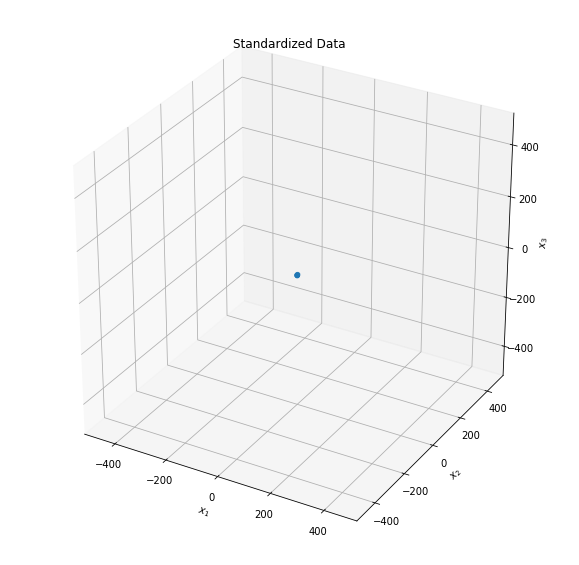

In [8]:

data_std = data-np.mean(data,axis=0) #centralize data
data_std = data_std/np.std(data,axis=0) #unit variance


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_std[:,0],data_std[:,1],data_std[:,2])
ax.set_xlim(-500,500)
ax.set_ylim(-500,500)
ax.set_zlim(-500,500)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.set_title('Standardized Data')
fig.show()


In [9]:

pca = PCA(2)
pca.fit(data_std) 
pca_data = pca.get_transform()


In [10]:

print('Covariance Matrix\n',pca.get_covariance(),'\n')
print('eigenvalues\n',pca.get_eigenvalues(),'\n')
print('eigenvectors\n',pca.get_eigenvectors(),'\n')


Covariance Matrix
 [[ 1.         -0.28867513  0.49099025]
 [-0.28867513  1.          0.56694671]
 [ 0.49099025  0.56694671  1.        ]] 

eigenvalues
 [1.62268243 1.28450547 0.0928121 ] 

eigenvectors
 [[ 0.35799198  0.77248475  0.5245084 ]
 [ 0.53242625 -0.63034666  0.56496494]
 [ 0.76704891  0.07700912 -0.63695021]] 



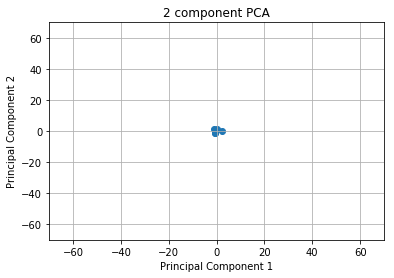

Explained Variance Ration: [0.5408941449971195, 0.42816848921643236]


In [11]:

plt.scatter(pca_data[:,0],pca_data[:,1],alpha=1)
plt.xlim(-70,70)
plt.ylim(-70,70)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
plt.grid()
plt.show()
print('Explained Variance Ration:',pca.get_explained_variance_ratio())


---

Above transformation is a good representation of the sample because we have unit variance along features, which was missing in `part(a)`, and first 2 principal components explains ~97% of the total variation in the original data. 

---

### Part(c)

When we apply PCA to 3 dimensional data and only largest 2 eigenvalues of $\sum$ are non-zero, then it means that we can actually represent the original 3d data in a 2 dimensional space with a linear transformation without loosing any information. Which means that one of the columns of the data is actually redundant(one of the general problems in the signal processing together with noise) and can be expressed as a linear combination of other two columns.(column = feature) This is an example of how PCA can be used for dimension reduction also.